Twitter Authorship Attribution Project

###Installing Libraries


In [1]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 1.0 MB/s 
     |████████████████████████████████| 5.8 MB 25.6 MB/s 
     |████████████████████████████████| 1.3 MB 47.9 MB/s 
     |████████████████████████████████| 182 kB 39.6 MB/s 
     |████████████████████████████████| 7.6 MB 16.6 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=1236916769ac17f5bfe5fa5f9c737baa5e863ed6d656de4941bb8a6a1c81e961
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


###Importing Libraries

In [2]:
import numpy as np
import pandas as pd
from google.colab import files
import io
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

###Reading and Combing Phase 1 Data

In [ ]:
timesOfIndia = files.upload()
gordanRamsey = files.upload()
sonamKapoor = files.upload()
cnni = files.upload()
wizKhalifa = files.upload()

Saving timesofindia_task2.csv to timesofindia_task2.csv


Saving cleanedramsey (1).csv to cleanedramsey (1).csv


Saving sonamakapoor_task3 (1).csv to sonamakapoor_task3 (1).csv


Saving cnni_task2_ph1.csv to cnni_task2_ph1.csv


In [ ]:
#reading all 5 csv files
dfTimes = pd.read_csv(io.BytesIO(timesOfIndia['timesofindia_task2.csv']))
dfGordan = pd.read_csv(io.BytesIO(gordanRamsey['cleanedramsey (1).csv']))
dfSonam = pd.read_csv(io.BytesIO(sonamKapoor['sonamakapoor_task3 (1).csv']))
dfcnni = pd.read_csv(io.BytesIO(cnni['cnni_task2_ph1.csv']))
dfWiz = pd.read_csv(io.BytesIO(wizKhalifa['wizkhalifa_task2.csv']))

In [ ]:
#adding username column, renaming columns to have same column name and dropping unnecesary columns for all dfs
dfTimes["User"] = "timesofindia"
dfTimes.columns = ['Tweet', "User"]
dfGordan.drop(['Unnamed: 0'], axis=1, inplace=True)
dfSonam["User"] = "sonamakapoor"
dfSonam.drop(['Unnamed: 0'], axis=1, inplace=True)
dfSonam.columns = ['Tweet', "User"]
dfcnni["User"] = "cnni"
dfcnni.drop(['Unnamed: 0'], axis=1, inplace=True)
dfcnni.columns = ['Tweet', "User"]
dfWiz["User"] = "wizkhalifa"
dfWiz.columns = ['Tweet', "User"]
dfWiz["Tweet"] = dfWiz["Tweet"].str.replace('\d+', '')

<ipython-input-175-b4856ea0ca85>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  dfWiz["Tweet"] = dfWiz["Tweet"].str.replace('\d+', '')


In [ ]:
#joining dataframe and resetting indices
df = pd.concat([dfTimes, dfGordan, dfSonam, dfcnni,dfWiz])
#saving combined csv
df.to_csv('allTweets.csv') 
df = df.dropna()

Uploading Saved Final Dataset


In [3]:
final = files.upload()
df = pd.read_csv(io.BytesIO(final['allTweets.csv']))
df = df.dropna()

Saving allTweets.csv to allTweets.csv


In [4]:
#label encoding User column
le = LabelEncoder()
labels = df["User"]
labels = le.fit_transform(labels)
df["User"] = labels

## Task 1


Vocabulary and BagofWords functions

In [5]:
#vocabulary
def vocabulizer(training): 
  vocabulary = []
  for tweet in training:
    vocabulary.append(tweet.split())
  vocabulary = [item for sublist in vocabulary for item in sublist]
  return [*set(vocabulary)]

In [6]:
#bag of words
def create_bow(tweet, vocab):
  l = len(vocab)
  bow = np.ones(l) # laplace smoothing
  #bow
  for i in range(l):
    for token in tweet.split():
      if vocab[i]==token:
        bow[i]+=1
  return bow

train_test splitting 80:20

In [7]:
train, test = train_test_split(df, test_size=0.20)

In [8]:
train.sample(5)

,Unnamed: 0,Tweet,User
2729,749,agree speak platform use,2
2568,588,princeraj sister like pav bhajji,2
3744,811,these winning images from the natural landscap...,1
2769,789,must never fearful right rosa parks,2
2198,218,anupampkher mybmc hope get well soon,2


Creating vocabulary and bow

In [9]:
#creating vocabulary
vocabulary = vocabulizer(train["Tweet"])

#creating bow for train and test set
train_bow = []
for tweet in train['Tweet']:
  train_bow.append(create_bow(tweet, vocabulary).tolist())
test_bow = []
for tweet in test['Tweet']:
  test_bow.append(create_bow(tweet,vocabulary).tolist())
train_bow = np.array(train_bow)
test_bow = np.array(test_bow)

In [10]:
train["bow"] = list(train_bow)
test["bow"] = list(test_bow)

Creating Embeddings for the tweets

In [11]:
model = SentenceTransformer('all-MiniLM-L6-v2')
#extracting tweets and creattting embeddings

train_sentences = train["Tweet"].to_list()
test_sentences = test["Tweet"].to_list()   

train_embeddings_list = list()
test_embeddings_list = list()

train_embeddings = model.encode(train_sentences)
test_embeddings = model.encode(test_sentences)

for sentence, embedding in zip(train_sentences, train_embeddings):
  train_embeddings_list.append(embedding)

for sentence, embedding in zip(test_sentences, test_embeddings):
  test_embeddings_list.append(embedding)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [12]:
train["Embedding"] = train_embeddings_list
test["Embedding"] = test_embeddings_list

In [13]:
#test train split for BoW
X_train_bow = train_bow 
y_train_bow = train["User"]

X_test_bow = test_bow
y_test_bow = test["User"]

In [14]:
#test train split for Embeddings
X_train_embeddings = train_embeddings_list
y_train_embeddings = train["User"]

X_test_embeddings = test_embeddings_list
y_test_embeddings = test["User"]

##Task 2: KNN

###KNN for Bag Of Words

using k-fold cross validation

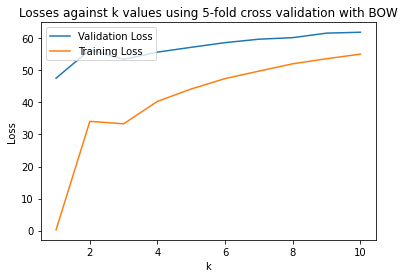

In [15]:
knn_BOW_validation_loss = [0,0,0,0,0,0,0,0,0,0]
knn_BOW_training_loss = [0,0,0,0,0,0,0,0,0,0]

for k in range(1,11):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_bow, y_train_bow)

  scores = cross_validate(knn, X_train_bow, y_train_bow,cv =5,return_train_score=True)
  knn_BOW_validation_loss[k-1] = (1 - scores['test_score'].mean() ) * 100
  knn_BOW_training_loss[k-1] = (1 - scores['train_score'].mean() ) * 100


x_axis = [1,2,3,4,5,6,7,8,9,10]
plt.plot(x_axis, knn_BOW_validation_loss, label='Validation Loss')
plt.plot(x_axis, knn_BOW_training_loss, label='Training Loss')

plt.title("Losses against k values using 5-fold cross validation with BOW")
plt.ylabel("Loss")
plt.xlabel("k")
plt.legend(loc="upper left")
plt.show()
  

Running using best K value for KNN-bag of words

Accuracy for KNN with BOW: 52.04081632653062
_________________________
Classification Report

              precision    recall  f1-score   support

           0       0.34      0.81      0.48       191
           1       1.00      0.63      0.77       201
           2       0.55      0.43      0.48       177
           3       0.96      0.22      0.35       208
           4       0.51      0.53      0.52       203

    accuracy                           0.52       980
   macro avg       0.67      0.52      0.52       980
weighted avg       0.68      0.52      0.52       980

_________________________
Confusion Matrix



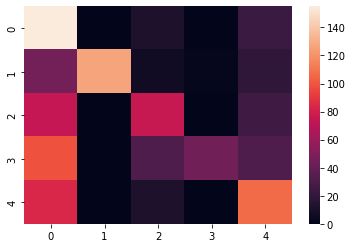

In [16]:
k = 1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_bow, y_train_bow)
ypred = knn.predict(X_test_bow)

score = metrics.accuracy_score(y_test_bow,ypred)
print("Accuracy for KNN with BOW:",score*100)
print("_________________________")
print("Classification Report\n")
print(classification_report(y_test_bow, ypred))
print("_________________________")
print("Confusion Matrix\n")
cMatrix = confusion_matrix(y_test_bow, ypred)
hm = sns.heatmap(data = cMatrix)
plt.show()

###KNN for Embeddings

using  k-fold cross validation

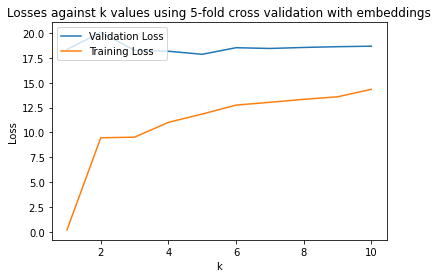

In [17]:
knn_embeddings_validation_loss = [0,0,0,0,0,0,0,0,0,0]
knn_embeddings_training_loss = [0,0,0,0,0,0,0,0,0,0]

for k in range(1,11):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(train_embeddings, y_train_embeddings)

  scores = cross_validate(knn, train_embeddings, y_train_embeddings ,cv =5,return_train_score=True)
  knn_embeddings_validation_loss[k-1] = (1 - scores['test_score'].mean() ) * 100
  knn_embeddings_training_loss[k-1] = (1 - scores['train_score'].mean() ) * 100
  

plt.plot(x_axis, knn_embeddings_validation_loss, label='Validation Loss')
plt.plot(x_axis, knn_embeddings_training_loss, label='Training Loss')

plt.title("Losses against k values using 5-fold cross validation with embeddings")
plt.ylabel("Loss")
plt.xlabel("k")
plt.legend(loc="upper left")
plt.show() 

Using best k value for embeddings

Accuracy for KNN with embeddings: 82.6530612244898
_________________________________________________________________________
Classification Report

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       191
           1       0.91      0.82      0.86       201
           2       0.78      0.86      0.82       177
           3       0.87      0.86      0.86       208
           4       0.79      0.74      0.77       203

    accuracy                           0.83       980
   macro avg       0.83      0.83      0.83       980
weighted avg       0.83      0.83      0.83       980

_________________________________________________________________________
Confusion Matrix



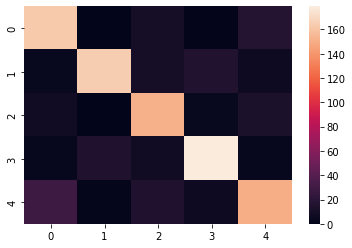

In [18]:
# using the best k = 1
k = 1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(train_embeddings, y_train_embeddings)
ypred = knn.predict(test_embeddings)

score = metrics.accuracy_score(y_test_embeddings,ypred)
print("Accuracy for KNN with embeddings:",score*100)
print("_________________________________________________________________________")
print("Classification Report\n")
print(classification_report(y_test_embeddings, ypred))
print("_________________________________________________________________________")
print("Confusion Matrix\n")
cMatrix = confusion_matrix(y_test_embeddings, ypred)
hm = sns.heatmap(data = cMatrix)
plt.show()

##Task 3: Neural Networks

###Neural Networds with Bag of Words

Using different number of layers and neurons per layer to find optimal parameters

In [ ]:
#could not run the cells in final submission
nn_bow_validation_loss = [0,0,0,0,0]
nn_bow_training_loss = [0,0,0,0,0]

layer_sizes = [ (75,50,25), (50,25,1), (80,40), (60,40), (5)]

for k in range(1,5):
  clf_bow = MLPClassifier(solver="lbfgs", alpha = 0.001, hidden_layer_sizes=layer_sizes[k-1],random_state=2, max_iter=1000, activation = "relu").fit(X_train_bow, y_train_bow)
  
  
  scores = cross_validate(clf_bow, X_train_bow, y_train_bow,cv =5,return_train_score=True)
  nn_bow_validation_loss[k-1] = (1 - scores['test_score'].mean() ) * 100
  nn_bow_training_loss[k-1] = (1 - scores['train_score'].mean() ) * 100
  

plt.plot(x_axis, nn_bow_validation_loss, label='Validation Loss')
plt.plot(x_axis, nn_bow_training_loss, label='Training Loss')

plt.title("Losses against hidden layers using 5-fold cross validation with BoW")
plt.ylabel("Loss")
plt.xlabel("k")
plt.legend(loc="upper left")
plt.show() 

Narrow and shallow neural network gives best accuracy

In [ ]:
#using optimal parameters
clf_embed = MLPClassifier(solver="lbfgs", alpha = 0.001, hidden_layer_sizes=(80,40), max_iter=1000, activation = "relu").fit(X_train_bow, y_train_bow)

ypred = clf_embed.predict(X_test_bow)
score = metrics.accuracy_score(y_test_bow,ypred)
print("Accuracy for NN with BOW:",score*100)
print("_________________________________________________________________________")
print("Classification Report\n")
print(classification_report(y_test_bow, ypred))
print("_________________________________________________________________________")
print("Confusion Matrix\n")
cMatrix = confusion_matrix(y_test_bow, ypred)
hm = sns.heatmap(data = cMatrix)
plt.show()


###Neural Networds with Embeddings

Using different number of layers and neurons per layer to find optimal parameters

In [ ]:
nn_embeddings_validation_loss = [0,0,0,0,0,0,0,0,0,0]
nn_embeddings_training_loss = [0,0,0,0,0,0,0,0,0,0]

layer_sizes = [ (150,100,50,5) , (75,50,25,5), (75,50,25,1), (70,50,30,5), (200,100,50), (100,50,5) , (75,50,25), (50,25,1), (20,5), (5)]

for k in range(1,11):
  clf_embed = MLPClassifier(solver="lbfgs", alpha = 0.001, hidden_layer_sizes=layer_sizes[k-1],random_state=2, max_iter=1000, activation = "relu").fit(X_train_embeddings, y_train_embeddings)
  clf_embed.out_activation_="softmax"
  
  scores = cross_validate(clf_embed, X_train_embeddings, y_train_embeddings,cv =5,return_train_score=True)
  nn_embeddings_validation_loss[k-1] = (1 - scores['test_score'].mean() ) * 100
  nn_embeddings_training_loss[k-1] = (1 - scores['train_score'].mean() ) * 100
  

plt.plot(x_axis, nn_embeddings_validation_loss, label='Validation Loss')
plt.plot(x_axis, nn_embeddings_training_loss, label='Training Loss')

plt.title("Losses against hidden layers using 5-fold cross validation with embeddings")
plt.ylabel("Loss")
plt.xlabel("k")
plt.legend(loc="upper left")
plt.show() 

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Wide and shallow neural networks give the best accuracy

Accuracy for NN with embeddings: 87.14285714285714
_________________________________________________________________________
Classification Report

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       191
           1       0.95      0.97      0.96       201
           2       0.79      0.84      0.81       177
           3       0.93      0.91      0.92       208
           4       0.84      0.81      0.82       203

    accuracy                           0.87       980
   macro avg       0.87      0.87      0.87       980
weighted avg       0.87      0.87      0.87       980

_________________________________________________________________________
Confusion Matrix



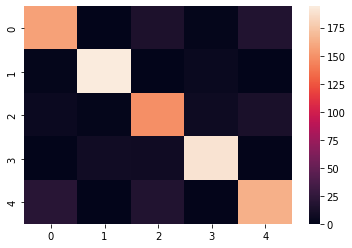

In [20]:
#using optimal parameters

clf_embed = MLPClassifier(solver="lbfgs", alpha = 0.001,hidden_layer_sizes=(500,300), max_iter=1000, activation = "relu").fit(X_train_embeddings, y_train_embeddings)
clf_embed.out_activation_="softmax"
ypred = clf_embed.predict(X_test_embeddings)

score = metrics.accuracy_score(y_test_embeddings,ypred)
print("Accuracy for NN with embeddings:",score*100)
print("_________________________________________________________________________")
print("Classification Report\n")
print(classification_report(y_test_embeddings, ypred))
print("_________________________________________________________________________")
print("Confusion Matrix\n")
cMatrix = confusion_matrix(y_test_embeddings, ypred)
hm = sns.heatmap(data = cMatrix)
plt.show()

##Task 4: Ensemble Methods

### Bagging 

Bagging for Bag of Words

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for Bagging Classifier with BOW: 82.75510204081633
_________________________________________________________________________
Classification Report

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       191
           1       1.00      0.99      0.99       201
           2       0.74      0.78      0.76       177
           3       0.96      0.78      0.86       208
           4       0.67      0.83      0.74       203

    accuracy                           0.83       980
   macro avg       0.84      0.83      0.83       980
weighted avg       0.84      0.83      0.83       980

_________________________________________________________________________
Confusion Matrix



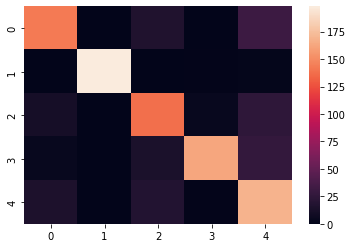

In [21]:
#inspiration taken from https://medium.com/mlearning-ai/ensemble-learning-bagging-with-python-59bd7732fd01

clf = LogisticRegression(random_state=0,max_iter = 1000)
bag = BaggingClassifier(
  base_estimator=clf,
  n_estimators=1,
  random_state=0)

bag = bag.fit(X_train_bow, y_train_bow)

y_test_pred = bag.predict(X_test_bow)



score = metrics.accuracy_score(y_test_bow,y_test_pred)
print("Accuracy for Bagging Classifier with BOW:",score*100)
print("_________________________________________________________________________")
print("Classification Report\n")
print(classification_report(y_test_bow, y_test_pred))
print("_________________________________________________________________________")
print("Confusion Matrix\n")
cMatrix = confusion_matrix(y_test_bow, y_test_pred)
hm = sns.heatmap(data = cMatrix)
plt.show()


Bagging for Embeddings

Accuracy for Bagging Classifier with embeddings: 83.46938775510205
_________________________________________________________________________
Classification Report

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       191
           1       0.83      0.98      0.90       201
           2       0.81      0.77      0.79       177
           3       0.94      0.80      0.87       208
           4       0.78      0.84      0.81       203

    accuracy                           0.83       980
   macro avg       0.84      0.83      0.83       980
weighted avg       0.84      0.83      0.83       980

_________________________________________________________________________
Confusion Matrix



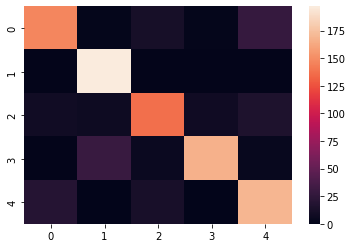

In [22]:
#inspiration taken from https://medium.com/mlearning-ai/ensemble-learning-bagging-with-python-59bd7732fd01

clf = LogisticRegression(random_state=0,max_iter = 1000)
bag = BaggingClassifier(
  base_estimator=clf,
  n_estimators=1,
  random_state=0)

bag = bag.fit(X_train_embeddings, y_train_embeddings)


y_test_pred = bag.predict(X_test_embeddings)


score = metrics.accuracy_score(y_test_embeddings,y_test_pred)
print("Accuracy for Bagging Classifier with embeddings:",score*100)
print("_________________________________________________________________________")
print("Classification Report\n")
print(classification_report(y_test_embeddings, y_test_pred))
print("_________________________________________________________________________")
print("Confusion Matrix\n")
cMatrix = confusion_matrix(y_test_embeddings, y_test_pred)
hm = sns.heatmap(data = cMatrix)
plt.show()


###Boosting


Boosting for Bag of Words

Accuracy for Boosting with BOW: 78.26530612244898
_________________________________________________________________________
Classification Report

              precision    recall  f1-score   support

           0       0.88      0.68      0.76       191
           1       1.00      0.98      0.99       201
           2       0.89      0.60      0.72       177
           3       0.97      0.68      0.80       208
           4       0.52      0.95      0.67       203

    accuracy                           0.78       980
   macro avg       0.85      0.78      0.79       980
weighted avg       0.85      0.78      0.79       980

_________________________________________________________________________
Confusion Matrix



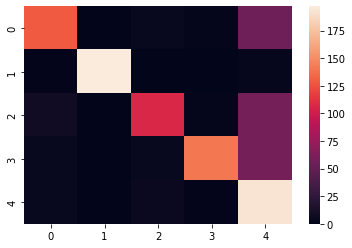

In [23]:
boost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
boost = boost.fit(X_train_bow, y_train_bow)

y_test_pred = boost.predict(X_test_bow)

score = metrics.accuracy_score(y_test_bow,y_test_pred)
print("Accuracy for Boosting with BOW:",score*100)
print("_________________________________________________________________________")
print("Classification Report\n")
print(classification_report(y_test_bow, y_test_pred))
print("_________________________________________________________________________")
print("Confusion Matrix\n")
cMatrix = confusion_matrix(y_test_bow, y_test_pred)
hm = sns.heatmap(data = cMatrix)
plt.show()


Boosting for Embeddings

Accuracy for Boosting with Embeddings: 76.83673469387755
_________________________________________________________________________
Classification Report

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       191
           1       0.81      0.86      0.84       201
           2       0.70      0.72      0.71       177
           3       0.85      0.78      0.82       208
           4       0.72      0.74      0.73       203

    accuracy                           0.77       980
   macro avg       0.77      0.77      0.77       980
weighted avg       0.77      0.77      0.77       980

_________________________________________________________________________
Confusion Matrix



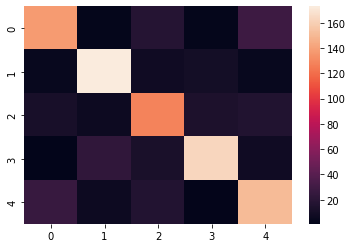

In [24]:
boost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

boost = boost.fit(X_train_embeddings, y_train_embeddings)

# Predicting the training set
# y_train_pred = boost.predict(train_embeddings)
# Predicting the test set
y_test_pred = boost.predict(X_test_embeddings)


score = metrics.accuracy_score(y_test_embeddings,y_test_pred)
print("Accuracy for Boosting with Embeddings:",score*100)
print("_________________________________________________________________________")
print("Classification Report\n")
print(classification_report(y_test_embeddings, y_test_pred))
print("_________________________________________________________________________")
print("Confusion Matrix\n")
cMatrix = confusion_matrix(y_test_embeddings, y_test_pred)
hm = sns.heatmap(data = cMatrix)
plt.show()


###Random Forest Classifier

RandomForest with Bag of Words

Accuracy for Random Forest with BOW: 68.06122448979592
_________________________________________________________________________
Classification Report

              precision    recall  f1-score   support

           0       0.77      0.66      0.72       191
           1       1.00      1.00      1.00       201
           2       0.81      0.45      0.58       177
           3       0.45      1.00      0.62       208
           4       0.95      0.26      0.40       203

    accuracy                           0.68       980
   macro avg       0.79      0.67      0.66       980
weighted avg       0.79      0.68      0.66       980

_________________________________________________________________________
Confusion Matrix



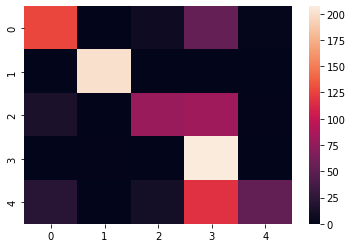

In [25]:
clf = RandomForestClassifier(n_estimators=1000,max_depth=2, random_state=0,criterion='entropy')
clf.fit(X_train_bow, y_train_bow)

y_test_pred = clf.predict(X_test_bow)


score = metrics.accuracy_score(y_test_bow,y_test_pred)
print("Accuracy for Random Forest with BOW:",score*100)
print("_________________________________________________________________________")
print("Classification Report\n")
print(classification_report(y_test_bow, y_test_pred))
print("_________________________________________________________________________")
print("Confusion Matrix\n")
cMatrix = confusion_matrix(y_test_bow, y_test_pred)
hm = sns.heatmap(data = cMatrix)
plt.show()

RandomForest with Embeddings

Accuracy for Random Forest with Embeddings: 68.77551020408164
_________________________________________________________________________
Classification Report

              precision    recall  f1-score   support

           0       0.57      0.80      0.67       191
           1       0.75      0.84      0.79       201
           2       0.82      0.34      0.49       177
           3       0.71      0.84      0.77       208
           4       0.70      0.58      0.63       203

    accuracy                           0.69       980
   macro avg       0.71      0.68      0.67       980
weighted avg       0.71      0.69      0.67       980

_________________________________________________________________________
Confusion Matrix



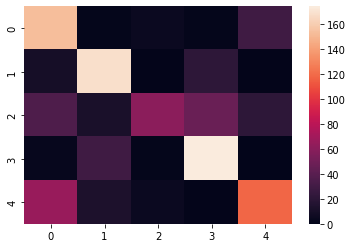

In [26]:
clf = RandomForestClassifier(n_estimators=1000,max_depth=2, random_state=0,criterion='entropy')
clf.fit(X_train_embeddings, y_train_embeddings)

y_test_pred = clf.predict(X_test_embeddings)

score = metrics.accuracy_score(y_test_embeddings, y_test_pred)
print("Accuracy for Random Forest with Embeddings:",score*100)
print("_________________________________________________________________________")
print("Classification Report\n")
print(classification_report(y_test_embeddings, y_test_pred))
print("_________________________________________________________________________")
print("Confusion Matrix\n")
cMatrix = confusion_matrix(y_test_embeddings, y_test_pred)
hm = sns.heatmap(data = cMatrix)
plt.show()